## 1. Getting Started
At first you should install reuirements using `requirements.txt` file. After That you need to clone the files in `alignOT` folter and put it in the same folder as your code. Commands for this step are included in the `README` as well. After that you should import `utils.py` file.

In [1]:
from utils import *

%matplotlib notebook
plt.rcParams["figure.figsize"] = (7,5)

1*q0^1 + (-1*q1^1)i + (-1*q2^1)j + (-1*q3^1)k
1*q0^1 + (1*q1^1)i + (1*q2^1)j + (1*q3^1)k
0*q0^1q3^1 + 0*q1^1q3^1 + 0*q2^1q3^1 + (1*q1^2 + 2*q1^1q2^1 + 2*q1^1q3^1 + 1*q0^2 + 2*q0^1q2^1 + -2*q0^1q3^1 + -1*q3^2 + -1*q2^2)i + (2*q1^1q2^1 + 1*q2^2 + 2*q2^1q3^1 + 1*q0^2 + 2*q0^1q3^1 + -2*q0^1q1^1 + -1*q1^2 + -1*q3^2)j + (2*q1^1q3^1 + 2*q2^1q3^1 + 1*q3^2 + 1*q0^2 + 2*q0^1q1^1 + -2*q0^1q2^1 + -1*q2^2 + -1*q1^2)k


## 2. Load The Maps
After that you should load and sample the maps.

In [2]:
x, y, z = sample('Data/emd_1717.map', 72, 500)

# def sample(fname, th, num):
#
#
# input:
# fname shows name and address of the mrc file
# th is the thresholding parameter for the topology representing network
# num is the number of points you want
#
# output:
# x, y, z are lists with len(x)=len(y)=len(z)=num
# and (x[i], y[i], z[i]) shows the 3d coordinates of the i-th sampled point

128
(128, 128, 128)
0
400
800
1200
1600
2000
2400
2800
3200
3600


<IPython.core.display.Javascript object>


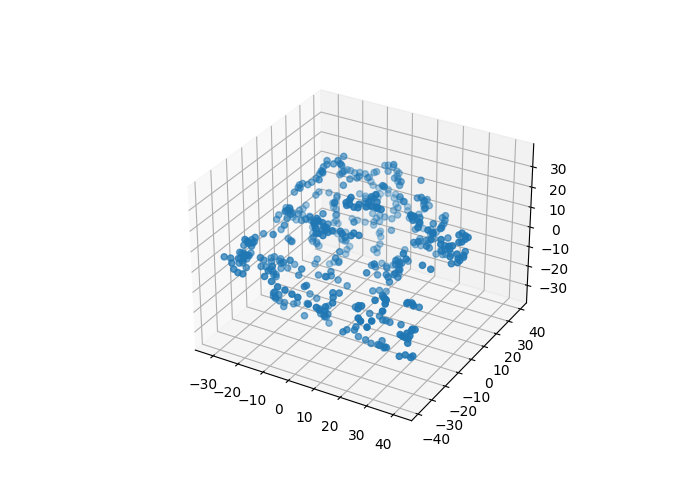

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d', adjustable='box')
ax.scatter(x, y, z,  marker='o')
plt.show()

Do the same for the second map.

128
(128, 128, 128)
0
400
800
1200
1600
2000
2400
2800
3200
3600


<IPython.core.display.Javascript object>


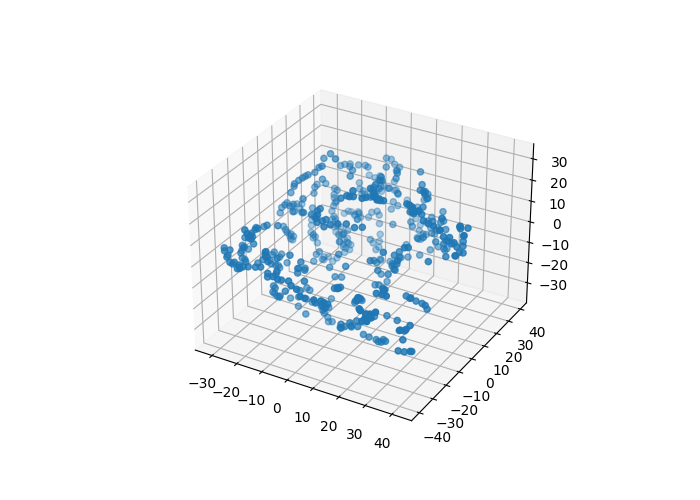

In [7]:
xr, yr, zr = sample('Data/emd_1717.map', 72, 500)

fig = plt.figure()
ax = fig.gca(projection='3d', adjustable='box')
ax.scatter(xr, yr, zr,  marker='o')
plt.show()

(optional) you can apply a rotation on these point clouds if you want.

In [9]:
xr, yr, zr = perform(xr, yr, zr, get_quaternion_vals(30 * math.pi /180, 0, 1, 0))

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d', adjustable='box')
ax.scatter(xr, yr, zr,  marker='o')
plt.show()

<IPython.core.display.Javascript object>

## 3. Run alignOT
In the next step you should run `alignOT` on the prepared data.

In [ ]:
quartenions, costs = SGD(x, y, z, xr, yr, zr, lr=0.00001, max_iter=500, reg=30, num_samples=1, verbose=True)

Iteration number 9, the wasserstein deistance is 107.00
Iteration number 19, the wasserstein deistance is 106.53
Iteration number 29, the wasserstein deistance is 104.63
Iteration number 39, the wasserstein deistance is 102.61
Iteration number 49, the wasserstein deistance is 100.98
Iteration number 59, the wasserstein deistance is 99.92
Iteration number 69, the wasserstein deistance is 99.95
Iteration number 79, the wasserstein deistance is 99.30
Iteration number 89, the wasserstein deistance is 98.95
Iteration number 99, the wasserstein deistance is 98.73
Iteration number 109, the wasserstein deistance is 97.44
Iteration number 119, the wasserstein deistance is 96.37
Iteration number 129, the wasserstein deistance is 94.41
Iteration number 139, the wasserstein deistance is 93.41
Iteration number 149, the wasserstein deistance is 92.62
Iteration number 159, the wasserstein deistance is 91.28
Iteration number 169, the wasserstein deistance is 90.92
Iteration number 179, the wasserstein

## 4. Analyze The Outputs

In [ ]:
print("The final found quaternion is:")
print(quartenions[-1])
print("The ideal quaternion is:")
print(get_quaternion_vals(math.pi/6, 0, 1, 1))
print("The angle difference is %0.2f degree(s)."%(diff_quaternions(quartenions[-1], get_quaternion_vals(math.pi/6, 0, 1, 0)),))


fig, ax = plt.subplots()
plt.title('Convergence Diagram')
plt.xlabel('iteration number')
plt.ylabel('Wasserstein distance')
plt.plot(costs)
plt.show()

x_fin, y_fin, z_fin = perform(x, y, z, quartenions[-1])

fig = plt.figure()
ax = fig.gca(projection='3d', adjustable='box')
ax.scatter(x, y, z, c='C0',  marker='o', label='source map')
ax.scatter(xr, yr, zr, c='C1', marker='o', label='destination map')
ax.scatter(x_fin, y_fin, z_fin, c='C2',  marker='o', label='output')
plt.legend()
plt.show()